In [2]:
import ImageLoader
import ImageCompare
import database
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib notebook

In [28]:
def identify(save=True, from_file=False):
    """
    Takes a picture with configured camera and identifies all of the faces in the picture
    Parameters:
    -----------
    save (boolean):
        whether or not to add the captured image to the database
    from_file(boolean):
        whether or not expect a filename instead of taking a picture
    
    Returns:
    --------
    names (list)
        the list of the name of each person in the picture
    """
    if not from_file:
        descs = ImageLoader.describe()
    else:
        filepath = input('Please enter the location (filepath) of the image: ')
        img = ImageLoader.get_img_from_file(filepath)
        det = ImageLoader.find_faces(img)
        descs = ImageLoader.find_descriptors(img, det)
    names = ImageCompare.compare_faces(descs, database.database)
    if save:
        if len(descs) > 1:
            print("Cannot add multiple people at once.")
        elif len(descs) < 1:
            print("There's no one there!")
        else:
            database.add_image(descs[0], name=names[0])
    return names

In [8]:
def draw_faces(detections, people, img):
    """
    Draws bounding boxes over image, and labels them with people.
    
    Parameters
    ----------
    detections: list of rectangles
        List of bounding box rectangles corresponding to the position of each detected face.
    people: list of strings
        List of the keys/names of people as found by compare_faces(), or None if no match is found.
    img: numpy array, shape (480, 640, 3)
        The array representing the image.
    """
    fig, ax = plt.subplots()
    ax.imshow(img)
    for i in range(len(detections)):
        d = detections[i]
        rect = patches.Rectangle((d.left(), d.top()), d.width(), d.height(), fill=False, color='white')
        ax.add_patch(rect)
        if people[i] is not None:
            ax.text(d.left(), d.top() + d.height() + 22, people[i], color='white')
    plt.show()

In [9]:
def go():
    test = ImageLoader.get_img_from_camera()
    draw_faces(ImageLoader.find_faces(test), ImageCompare.compare_faces(ImageLoader.find_descriptors(test, ImageLoader.find_faces(test)), database.database), test)

In [11]:
identify(save=True)

['Jaden Tennis']

<IPython.core.display.Javascript object>


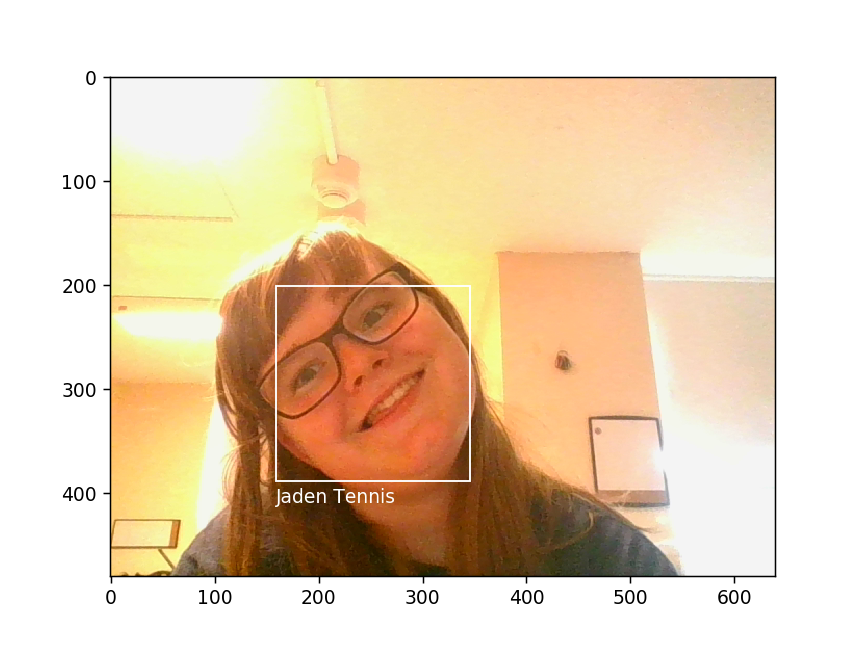

In [31]:
go()

In [19]:
def add_file(filepath):
    """
    Adds a person to the database given a picture of their face
    Will ask for their name
    
    Parameters
    ----------
    filepath (string):
        the location of the file that is the picture of the person's face
    Returns:
    --------
    None
    """
    img = ImageLoader.get_img_from_file(filepath)
    det = ImageLoader.find_faces(img)
    descriptor = ImageLoader.find_descriptors(img, det)
    database.add_image(descriptor)

In [20]:
add_file("Captain_Picard_Chair.jpg")

Please enter your name: Jean Luc Picard


In [29]:
identify(from_file=True)

Please enter the location (filepath) of the image: star-trek-jean-luc-picard.jpg


['Jean Luc Picard']